In [2]:
'''Importing necessary Python packages '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import json

In [79]:
'''Opening the given file and reading it line by line to identify the number of nodes and edges'''

input_file=("network.txt") #the input network file path

network_raw=open(input_file) # load the network file
lines_list=network_raw.readlines() # reading lines

all_nodes=[]
indegree_dict={}  
dict_list={}
edges=0


for i in lines_list:             #to iterate over the lines of the file
    list_line =i.split(",")              #the separator ',' is used to split the list
    all_nodes.append(int(list_line[0]))
    list_line_len=len(list_line)

    current_node=int(list_line[0])
    connections=list_line[1:list_line_len]
    connections = list(map(int, connections)) #map() helps in iterating over the list to convert to int type
    dict_list[current_node]=connections  #using a dict type to map all edges to a node
    indegree_dict[current_node]= list_line_len
    edges= edges+list_line_len-1

    
print("The total number of nodes in the given network is :", len(all_nodes))

print("The total number of edges in the given network are :",edges)
    

The total number of nodes in the given network is : 61653
The total number of edges in the given network are : 1811269


In [5]:
''' Loading the information on degree to plot the In Degree Graph '''

#Loading the dictionary with the firm : degree as a Dataframe
df=pd.DataFrame(indegree_dict.items(), columns=['Firm_No', 'Degree']) 

# The individual counts of the Degree is loaded to a Dict and the Fraction is taken for each count
dic_counts=df['Degree'].value_counts().to_dict() 
values = dic_counts.values()
total = sum(values, 0.0)
dic_counts = {k: (v / total) for k, v in dic_counts.items()}

indegree_list=[]
indegree_count_list=[]
for i in sorted(dic_counts): 
    indegree_list.append(i)
    indegree_count_list.append(dic_counts[i])


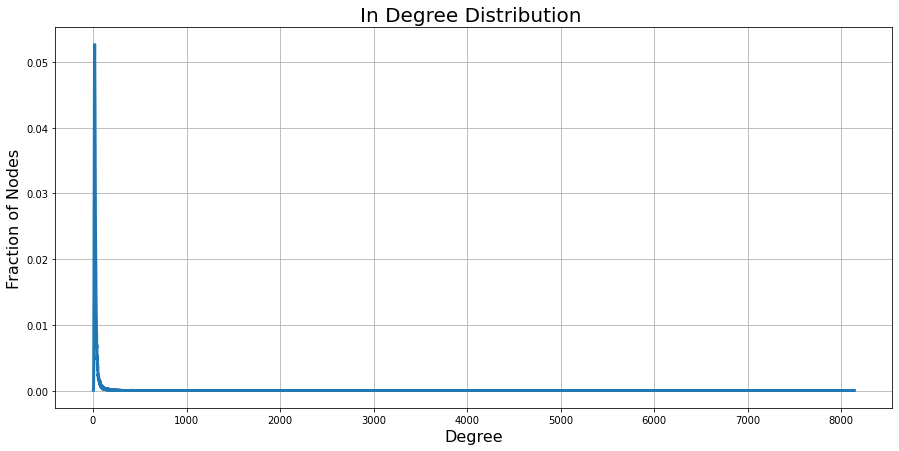

<Figure size 432x288 with 0 Axes>

In [86]:
'''Normal Plot of In degree distribution '''
fig, ax = plt.subplots(figsize=(15,7))
bins = 1000
legends = []

ax.plot(indegree_list,indegree_count_list, linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('Fraction of Nodes',fontsize=16 )
ax.set_title('In Degree Distribution ' , fontsize=20)
legends.append("")
ax.grid(True)

plt.show()
plt.savefig('in_degree_distribution.png')


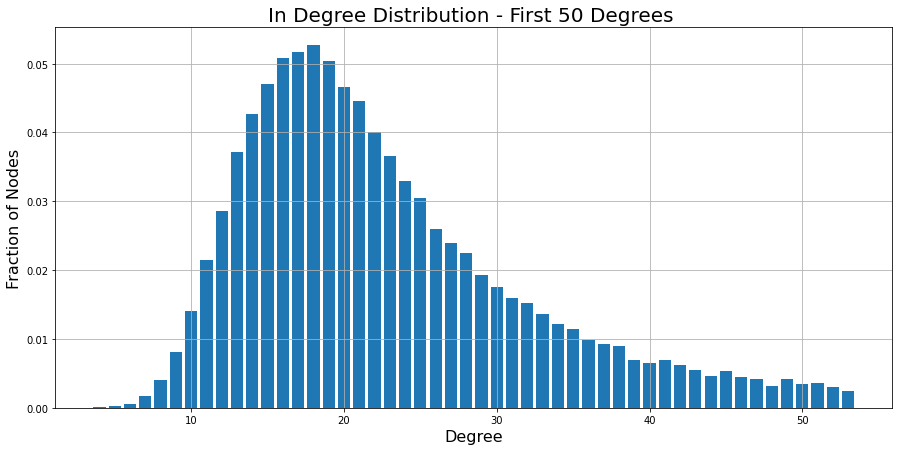

<Figure size 432x288 with 0 Axes>

In [85]:
'''Normal Plot of In degree distribution - First 50 Degrees '''
fig, ax = plt.subplots(figsize=(15,7))
bins = 1000
legends = []

ax.bar(indegree_list[0:50],indegree_count_list[0:50], linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('Fraction of Nodes',fontsize=16 )
ax.set_title('In Degree Distribution - First 50 Degrees ' , fontsize=20)
legends.append("")
ax.grid(True)

plt.show()
plt.savefig('in_degree_distribution_50.png')


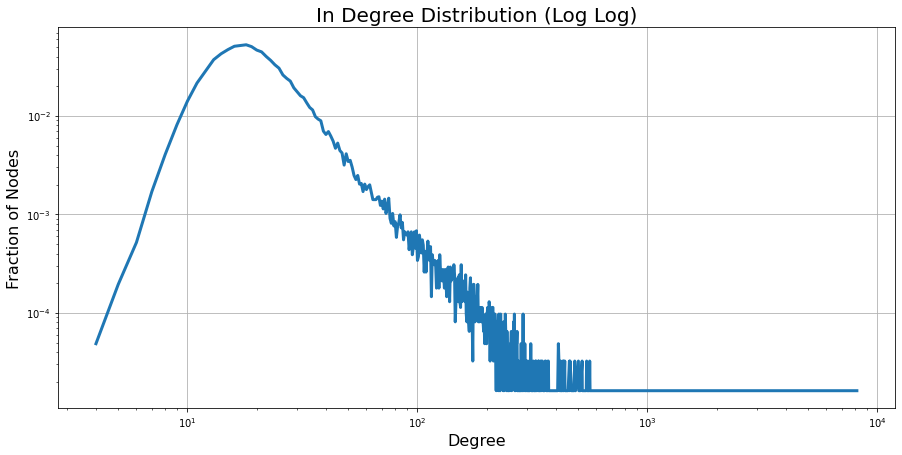

<Figure size 432x288 with 0 Axes>

In [72]:
'''Log Log Plot of In degree distribution '''
fig, ax = plt.subplots(figsize=(15,7))
legends = []

ax.plot(indegree_list,indegree_count_list, linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('Fraction of Nodes',fontsize=16 )
ax.set_title('In Degree Distribution (Log Log)' , fontsize=20)
legends.append("")
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()
plt.savefig('in_degree_distribution_loglog.png')

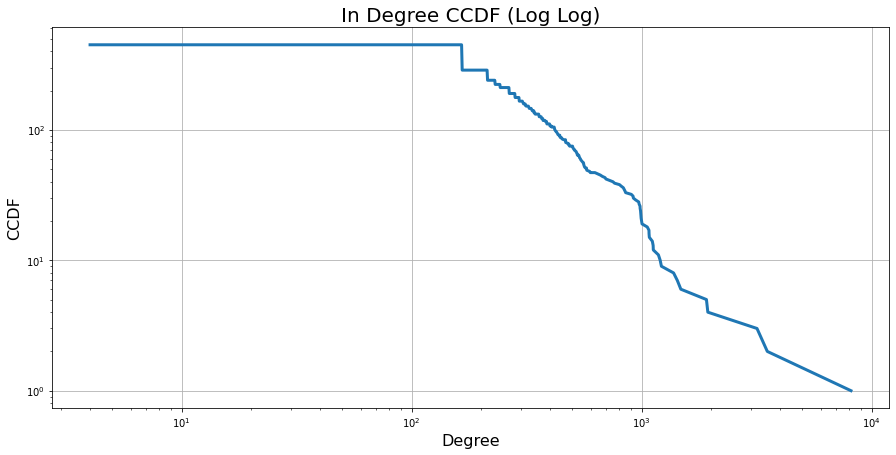

<Figure size 432x288 with 0 Axes>

In [80]:
'''CCDF Plot of In degree distribution '''

ccdf = np.zeros(len(list(dic_counts.values())))
data=np.sort(list(dic_counts.values()))
for i, count in enumerate(data):
    ccdf[i] = np.sum(list(dic_counts.values()) >= count)

fig, ax = plt.subplots(figsize=(15,7))
legends = []

ax.plot(indegree_list,ccdf, "-",linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('CCDF',fontsize=16 )
ax.set_title('In Degree CCDF (Log Log)' , fontsize=20)
legends.append("")
ax.grid(True)

ax.set_yscale('log')
ax.set_xscale('log')

plt.show()
plt.savefig('in_degree_ccdf.png')

In [81]:
'''To iterate over the network to identify out degree'''

# Initialize a dict() with all the nodes as keys and 0 as corresponding values,  
# we will incrementally add to values as we iterate 
 
outdegree_dict=dict(zip(all_nodes,np.repeat(0,len(all_nodes))))

# Loop to iterate over the lines of the file
for i in lines_list:                        
    list_line =i.split(",")                 #the separator ',' is used to split the list
    list_line_len=len(list_line)
    connections=list_line[1:list_line_len]
    connections = list(map(int, connections)) #map() helps in iterating over the list to convert to int type
    dict_list[current_node]=connections       #using a dict type to map all edges to a node
    
    # we count the occurrence of firm 2 in each firm 1 and add 1 to the value of firm 2 in outdegree_dict 
    for j in connections:                               
        outdegree_dict[int(j)]+=1


In [83]:
''' Loading the data on degree to plot the Out Degree Graph '''

#Loading the dictionary with the firm : degree as a Dataframe
df_1=pd.DataFrame(outdegree_dict.items(), columns=['Firm_No', 'Degree']) 

# The individual counts of the Degree is loaded to a Dict and the Fraction is taken for each count
dict_counts_1=df_1['Degree'].value_counts().to_dict() 
total = sum(dict_counts_1.values(), 0.0)
dict_counts_1 = {k: (v / total) for k, v in dict_counts_1.items()}

outdegree_list=[]
outdegree_count_list=[]
for i in sorted(dict_counts_1): 
    outdegree_list.append(i)
    outdegree_count_list.append(dict_counts_1[i])


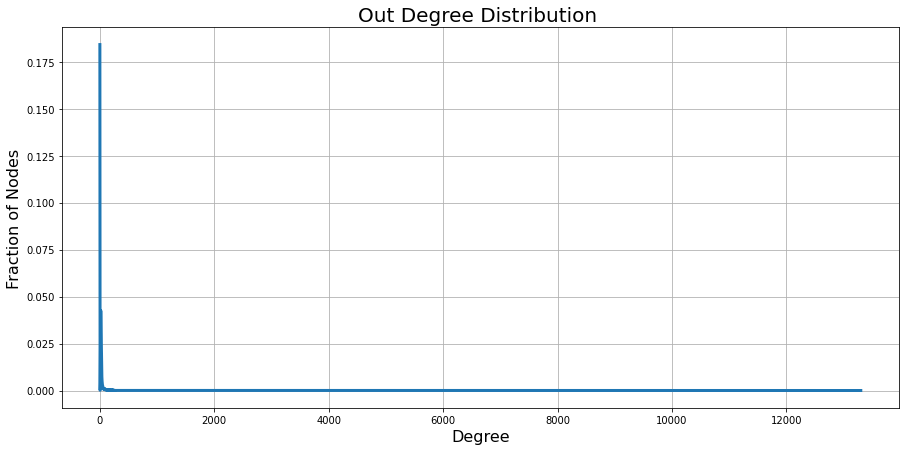

<Figure size 432x288 with 0 Axes>

In [87]:
'''Normal Plot of Out degree distribution '''
fig, ax = plt.subplots(figsize=(15,7))
bins = 1000
legends = []

ax.plot(outdegree_list,outdegree_count_list, linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('Fraction of Nodes',fontsize=16 )
ax.set_title('Out Degree Distribution ' , fontsize=20)
legends.append("")
ax.grid(True)

plt.show()
plt.savefig('out_degree_distribution.png')


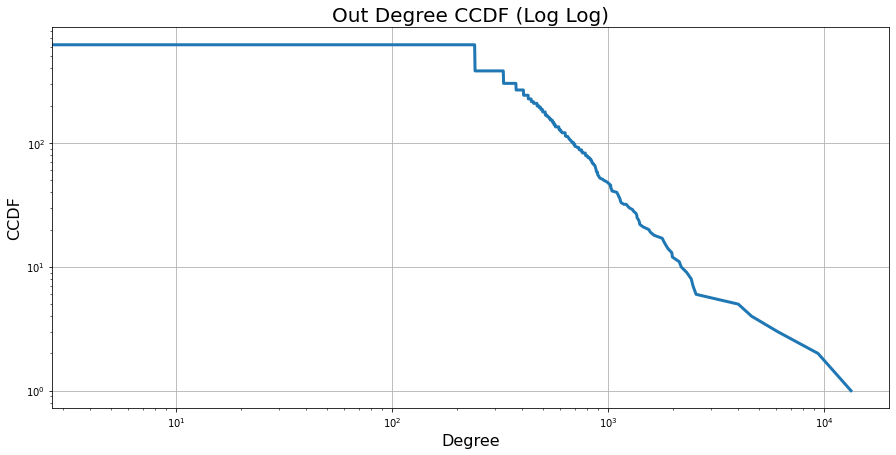

<Figure size 432x288 with 0 Axes>

In [91]:
'''CCDF Plot of Out degree distribution '''

ccdf = np.zeros(len(list(dict_counts_1.values())))
data=np.sort(list(dict_counts_1.values()))
for i, count in enumerate(data):
    ccdf[i] = np.sum(list(dict_counts_1.values()) >= count)

fig, ax = plt.subplots(figsize=(15,7))
legends = []

ax.plot(outdegree_list,ccdf, "-",linewidth=3, label='Empirical')
ax.set_xlabel('Degree', fontsize=16 )
ax.set_ylabel('CCDF',fontsize=16 )
ax.set_title('Out Degree CCDF (Log Log)' , fontsize=20)
legends.append("")
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()
plt.savefig('out_degree_ccdf.png')